### A recommender system, or a recommendation system, is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item. They are primarily used in commercial applications. (source - Wikipedia)

## Mainly three types of recommendation systems in machine learning based on filtering are used to suggest product and services to the consumers.

1. Content Filtering

2. Collaborative Filtering

3. Hybrid Filtering

### 1. Content Filtering:

In this algorithm, we try finding items look alike. Once we have item look like matrix,we can easily recommend alike items to a customer, who has purchased any item from the store.

### 2. Collaborative Filtering:

Here, we try to search for look alike customers and offer products based on what his/her lookalike has chosen.This algorithm is very effective but takes a lot of time and resources.

### 3. Hybrid Filtering (Content Filtering + Collaborative Filtering):

Both Content Filtering & Collaborative Filtering is used for the purpose. you-tube uses this algorithm for their strong recommendation system.


  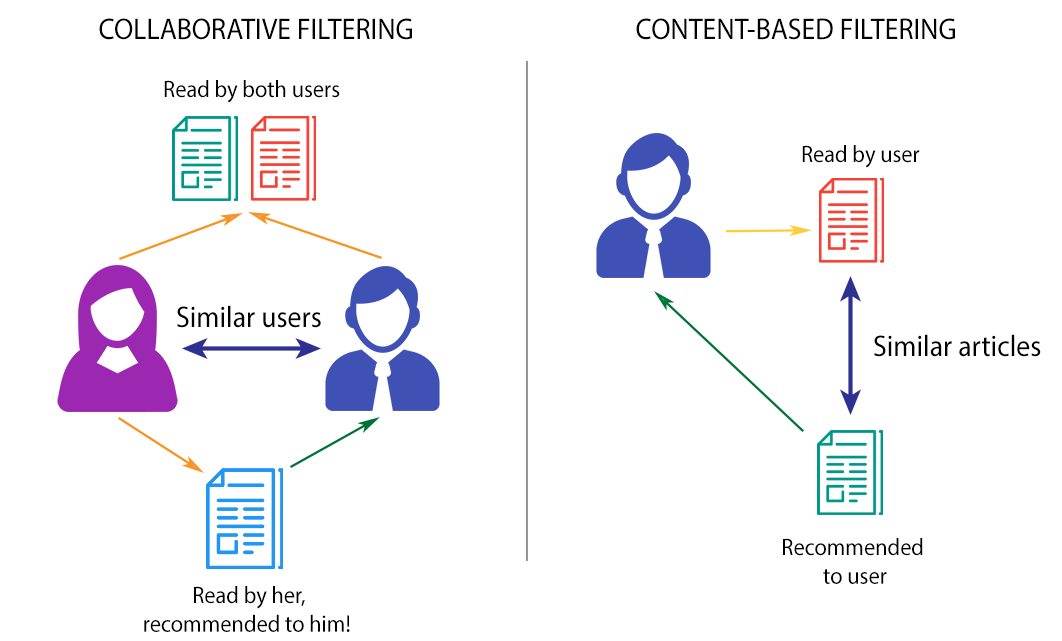

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bookcrossing-dataset/Book reviews/BX-Users.csv
/kaggle/input/bookcrossing-dataset/Book reviews/BX-Books.csv
/kaggle/input/bookcrossing-dataset/Book reviews/BX-Book-Ratings.csv


In [2]:
## importing datasets
users=pd.read_csv('/kaggle/input/bookcrossing-dataset/Book reviews/BX-Users.csv',sep=";",error_bad_lines=False, encoding='latin-1')
books = pd.read_csv('/kaggle/input/bookcrossing-dataset/Book reviews/BX-Books.csv',sep=";",error_bad_lines=False, encoding='latin-1')
rating=pd.read_csv('/kaggle/input/bookcrossing-dataset/Book reviews/BX-Book-Ratings.csv',sep=";",error_bad_lines=False, encoding='latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:30

In [3]:
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [4]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [5]:
books=books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']] #feature engineering : selecting features

In [6]:
books.head(2)

ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher  
0  Oxford University Press  
1    HarperFlamingo Canada

In [7]:
books.rename(columns={'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'},inplace=True) #feature engineering : changing the column names

In [8]:
books.head(2)

ISBN                title                author  year  \
0  0195153448  Classical Mythology    Mark P. O. Morford  2002   
1  0002005018         Clara Callan  Richard Bruce Wright  2001   

                 publisher  
0  Oxford University Press  
1    HarperFlamingo Canada

In [9]:
users.head(2)

User-ID                   Location   Age
0        1         nyc, new york, usa   NaN
1        2  stockton, california, usa  18.0

In [10]:
users.rename(columns={'User-ID':'user_id','Location':'location','Age':'age'},inplace=True) #feature engineering : changing the column names

In [11]:
rating.head(2)

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5

In [12]:
rating.rename(columns={'User-ID':'user_id','Book-Rating':'rating'},inplace=True) #feature engineering : changing the column names

In [13]:
rating.head(2)

user_id        ISBN  rating
0   276725  034545104X       0
1   276726  0155061224       5

In [14]:
books.shape

(271360, 5)

In [15]:
users.shape

(278858, 3)

In [16]:
rating.shape

(1149780, 3)

In [17]:
## unique users
rating['user_id'].value_counts().shape

(105283,)

In [18]:
## considering those users who have viewed more than 200 books
x=rating['user_id'].value_counts()>200


In [19]:
x[x].shape

(899,)

In [20]:
y=x[x].index

In [21]:
rating=rating[rating['user_id'].isin(y)]

In [22]:
rating.shape

(526356, 3)

In [23]:
rating_with_books=rating.merge(books,on='ISBN') ##those users who have viewed more than 200 books with there rating on books

In [24]:
rating_with_books.shape

(487671, 7)

In [25]:
number_rating=rating_with_books.groupby('title')['rating'].count().reset_index() ## total rating of a book 

In [26]:
number_rating.rename(columns={'rating':'number of rating'},inplace=True) #feature engineering : changing the column names

In [27]:
number_rating.head()

title  number of rating
0   A Light in the Storm: The Civil War Diary of ...                 2
1                              Always Have Popsicles                 1
2               Apple Magic (The Collector's series)                 1
3   Beyond IBM: Leadership Marketing and Finance ...                 1
4   Clifford Visita El Hospital (Clifford El Gran...                 1

In [28]:
final_ratings=rating_with_books.merge(number_rating,on='title') 

In [29]:
final_ratings.head()

user_id        ISBN  rating  \
0   277427  002542730X      10   
1     3363  002542730X       0   
2    11676  002542730X       6   
3    12538  002542730X      10   
4    13552  002542730X       0   

                                               title             author  year  \
0  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner  1994   
1  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner  1994   
2  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner  1994   
3  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner  1994   
4  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner  1994   

                   publisher  number of rating  
0  John Wiley &amp; Sons Inc                82  
1  John Wiley &amp; Sons Inc                82  
2  John Wiley &amp; Sons Inc                82  
3  John Wiley &amp; Sons Inc                82  
4  John Wiley &amp; Sons Inc                82

In [30]:
final_ratings.shape

(487671, 8)

In [31]:
final_ratings=final_ratings[final_ratings['number of rating']>=50] ## considering those books which has got more than 50 ratings 

In [32]:
final_ratings.shape

(61853, 8)

In [33]:
final_ratings.drop_duplicates(['user_id','title'],inplace=True) ## droping the same record 

In [34]:
final_ratings.shape

(59850, 8)

In [35]:
book_pivot=final_ratings.pivot_table(columns='user_id',index='title',values='rating') ## pivot table

In [36]:
book_pivot.shape

(742, 888)

In [37]:
book_pivot.fillna(0,inplace=True)

In [38]:
book_pivot

user_id                                             254     2276    2766    \
title                                                                        
1984                                                   9.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0    10.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
84 Charing Cross Road                                  0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

user_id                                             2977    3363    3757    \
title                                                                        
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
84 Charing Cross Road                                  0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        7.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

user_id                                             4017    4385    6242    \
title                                                                        
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
84 Charing Cross Road                                  0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     7.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

user_id                                             6251    ...  274004  \
title                                                       ...           
1984                                                   0.0  ...     0.0   
1st to Die: A Novel                                    0.0  ...     0.0   
2nd Chance                                             0.0  ...     0.0   
4 Blondes                                              0.0  ...     0.0   
84 Charing Cross Road                                  0.0  ...     0.0   
...                                                    ...  ...     ...   
Year of Wonders                                        0.0  ...     0.0   
You Belong To Me                                       0.0  ...     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0  ...     0.0   
Zoya                                                   0.0  ...     0.0   
\O\" Is for Outlaw"                                    

In [39]:
from scipy.sparse import csr_matrix
book_sparse=csr_matrix(book_pivot)

In [40]:
type(book_sparse)

scipy.sparse.csr.csr_matrix

In [41]:
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(algorithm='brute') ## model

In [42]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [43]:
book_pivot.iloc[237,:].values.reshape(1,-1)

array([[ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
         8.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         9.,  0.,  0.,  0., 10.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [44]:
distances,suggestions=model.kneighbors(book_pivot.iloc[54,:].values.reshape(1,-1))

In [45]:
distances

array([[ 0.        , 42.34383072, 43.48562981, 43.50861984, 43.56604182]])

In [46]:
suggestions ## recommendation

array([[ 54, 184, 291, 440, 393]])

In [47]:
for i in range(len(suggestions)):
    print(book_pivot.index[suggestions[i]])

Index(['Animal Farm', 'Exclusive', 'Jacob Have I Loved', 'Second Nature',
       'Pleading Guilty'],
      dtype='object', name='title')


In [48]:
def reco(book_name):
    book_id=np.where(book_pivot.index==book_name)[0][0]
    distances,suggestions=model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1))
    
    
    
    for i in range(len(suggestions)):
        if i==0:
            print("the suggestions are ",book_name,"are : ")
        if not i:
            print(book_pivot.index[suggestions[i]])

In [49]:
reco('Animal Farm')

the suggestions are  Animal Farm are : 
Index(['Animal Farm', 'Exclusive', 'Jacob Have I Loved', 'Second Nature',
       'Pleading Guilty'],
      dtype='object', name='title')
